# Flower Recognition 

### Dataset

#### Attributes :

Sepal length in cm

Sepal width in cm

Petal length in cm

Petal width in cm

Class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df = pd.read_csv('iris.data')

In [9]:
#number of rows and columns
df.shape

(150, 5)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#describing the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#values in each class
df['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

### 2-D Scatter Plot

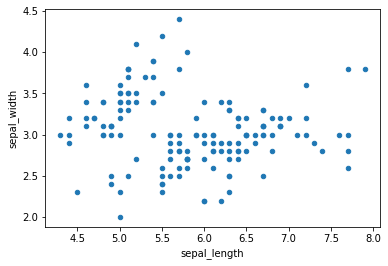

In [14]:
df.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()
#without color we are not able to distinguish between the classes

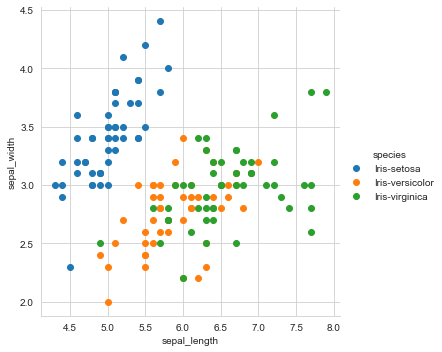

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species", height = 5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

#### Now we are able to differentiate between three classes.
#### Though we are not able to seperate versicolor and virginica, sentosa is seperated from other two.

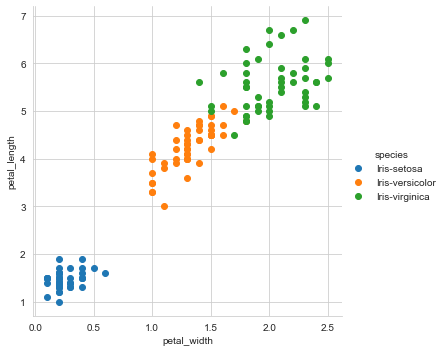

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species", height = 5) \
   .map(plt.scatter, "petal_width", "petal_length") \
   .add_legend();
plt.show();

#### Here you can see even if our model is not 100% efficient, we are able to seperate 3 classes

#### Next we plot different graphs to understad which features are important

### 1-D Scatter Plot

1-D Scatter Plot of petal_length

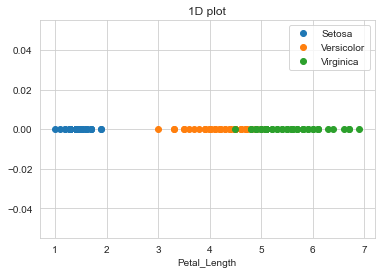

In [38]:
iris_setosa = df.loc[df['species'] == "Iris-setosa"]
iris_versicolor = df.loc[df['species'] == "Iris-versicolor"]
iris_virginica = df.loc[df['species'] == "Iris-virginica"]

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Petal_Length')
plt.title('1D plot')

plt.show()

#### From 1-D Scatter plot it is clearly observed that the datapoints are overlapping and it is difficult to seperate the points.

### Histogram

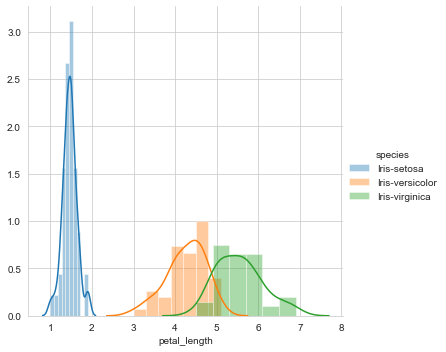

In [56]:
sns.FacetGrid(df, hue='species', height=5) \
   .map(sns.distplot, 'petal_length') \
   .add_legend();
plt.show();

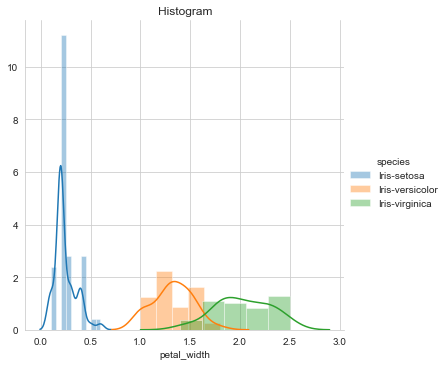

In [49]:
sns.FacetGrid(df, hue='species', height=5) \
   .map(sns.distplot, 'petal_width') \
   .add_legend();
plt.title("Histogram")
plt.show();

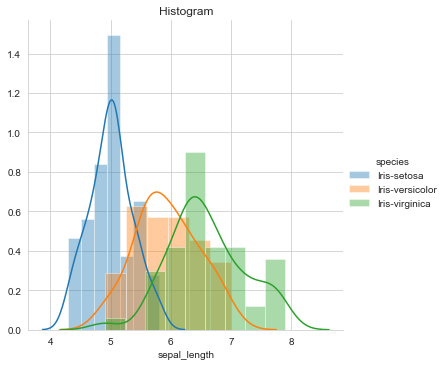

In [51]:
sns.FacetGrid(df, hue='species', height=5) \
   .map(sns.distplot, 'sepal_length') \
   .add_legend();
plt.title("Histogram")
plt.show();

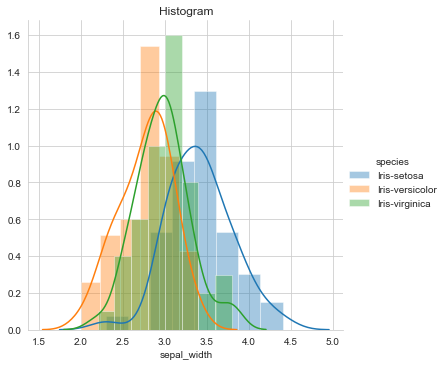

In [54]:
sns.FacetGrid(df, hue='species', height=5) \
   .map(sns.distplot, 'sepal_width') \
   .add_legend();
plt.title("Histogram")
plt.show();

#### By performing these histogram plots it is clear that sepal_length and sepal_width have many overlapping datapoints, it would be difficult to train the model and then classify in these features.


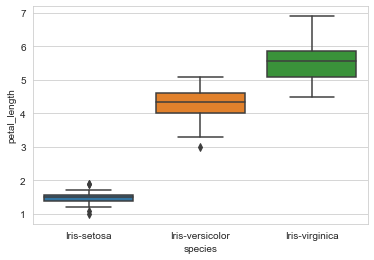

In [55]:
sns.boxplot(x='species',y='petal_length', data=df)
plt.show()

In [3]:
#Selecting the features
X = np.array(df.iloc[:, 2:4])
y = np.array(df.iloc[:, 4:])

In [4]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [5]:
y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [6]:
#Labelling the classes
le = LabelEncoder()
y = le.fit_transform(y)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Splitting the dataset in train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Training the model

In [9]:
sv = SVC(kernel='linear').fit(X_train,y_train)

In [198]:
#exporting the trained model
pickle.dump(sv, open('iri.pkl', 'wb'))

In [10]:
#Testing the trained model
y_pred = sv.predict(X_test)

In [11]:
#Accuracy of our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667
